In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

In [2]:

%cd ..

c:\Users\chris\OneDrive\Escritorio\Maestria\13. MLOps\Git 2\urban-traffic-prediction-repo


c:\Users\chris\OneDrive\Escritorio\Maestria\13. MLOps\Git 2\urban-traffic-prediction-repo\mlopsvenv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from src.data.preprocess import preprocess_data

preprocess_data('params.yaml')

2024-10-11 22:36:08,870 — DATA_PREPROCESS — INFO — Get dataset
2024-10-11 22:36:08,875 — DATA_PREPROCESS — INFO — Preprocess dataset
2024-10-11 22:36:08,880 — DATA_PREPROCESS — INFO — Preprocess Done


In [4]:
from src.data.process import DataFrameProcessor

processor = DataFrameProcessor('params.yaml')
processor.full_process()


2024-10-11 22:36:08,971 — DATA_PROCESS — INFO — Checking for missing values
2024-10-11 22:36:08,973 — DATA_PROCESS — INFO — Transforming days to numerical values
2024-10-11 22:36:08,995 — DATA_PROCESS — INFO — Data exported to data/processed/processed_data.csv



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   hour_coded                             135 non-null    int64  
 1   immobilized_bus                        135 non-null    int64  
 2   broken_truck                           135 non-null    int64  
 3   vehicle_excess                         135 non-null    int64  
 4   accident_victim                        135 non-null    int64  
 5   running_over                           135 non-null    int64  
 6   fire_vehicles                          135 non-null    int64  
 7   occurrence_involving_freight           135 non-null    int64  
 8   incident_involving_dangerous_freight   135 non-null    int64  
 9   lack_of_electricity                    135 non-null    int64  
 10  fire                                   135 non-n

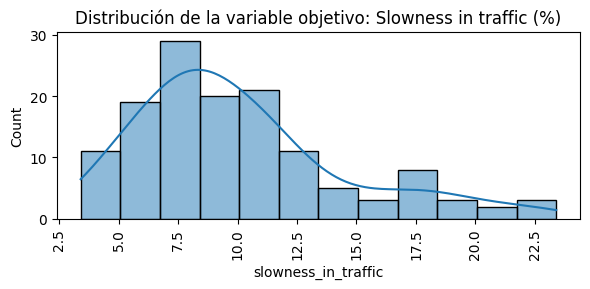

Se observa una distribución asimétrica hacia la derecha, teniendo la moda a 7.5%


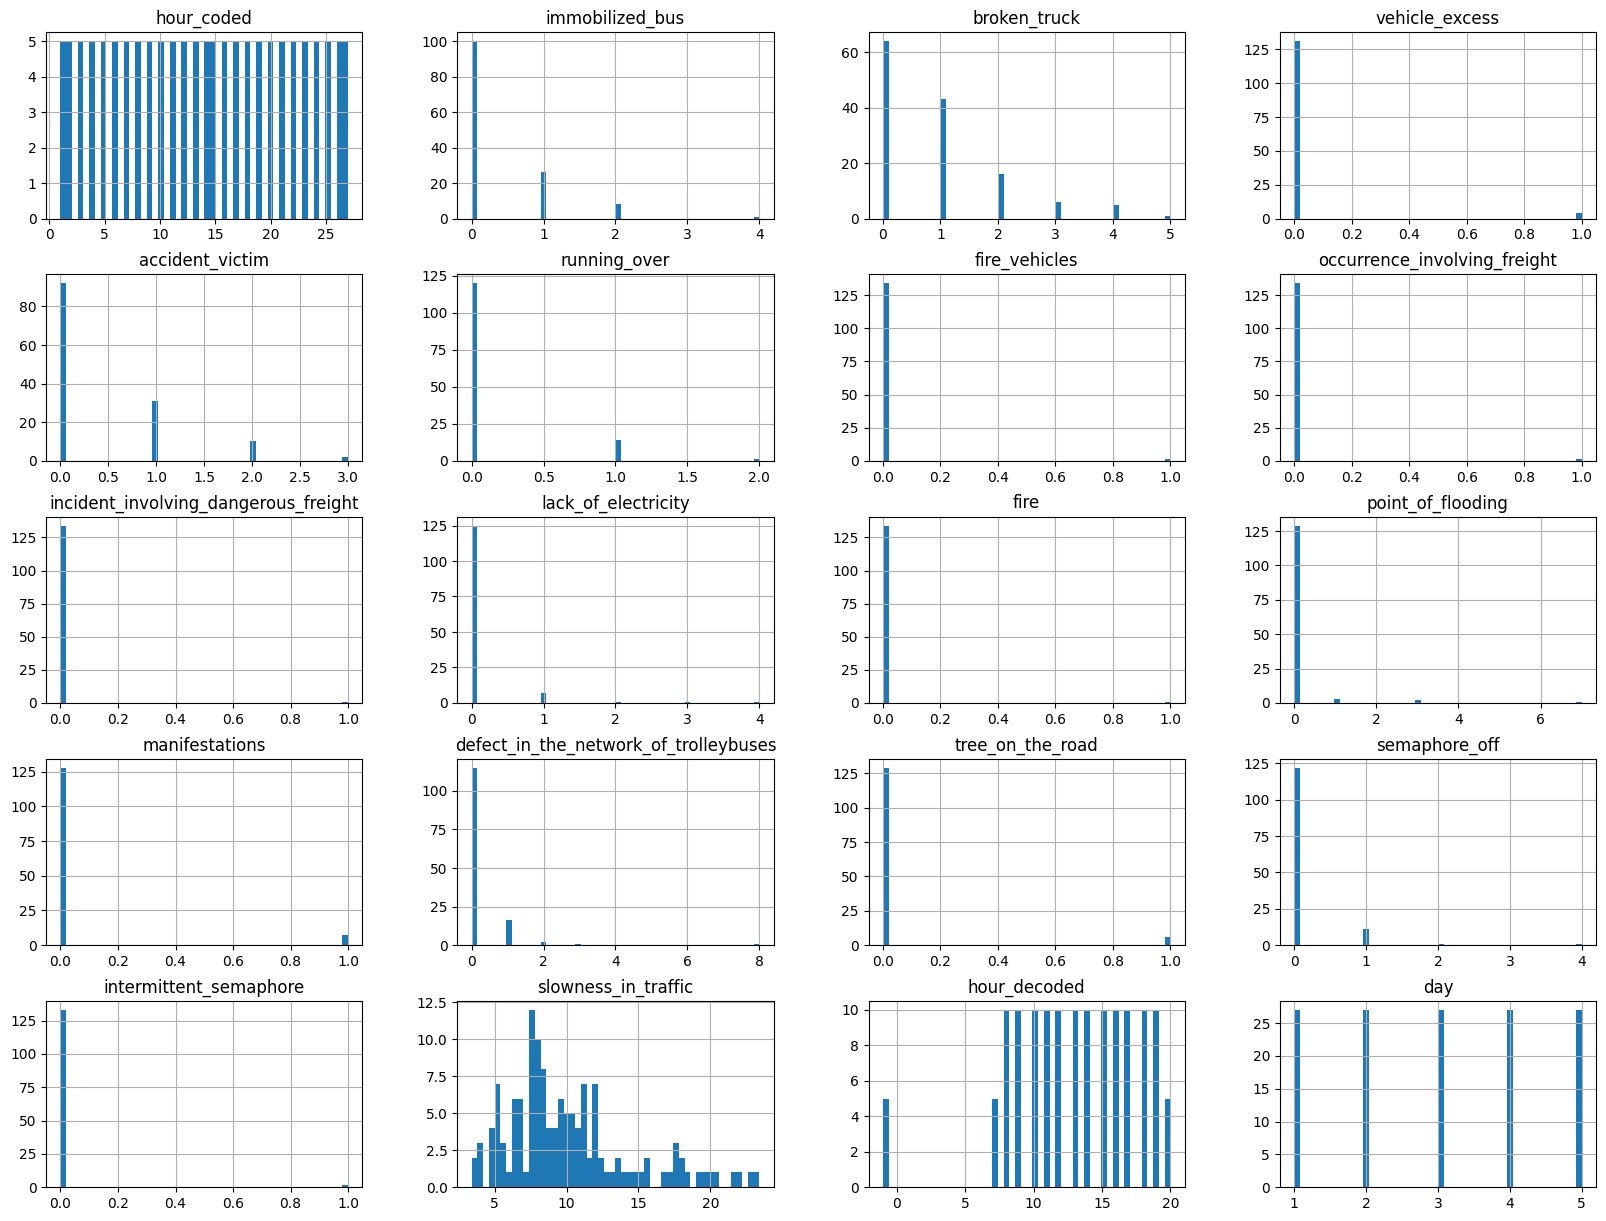

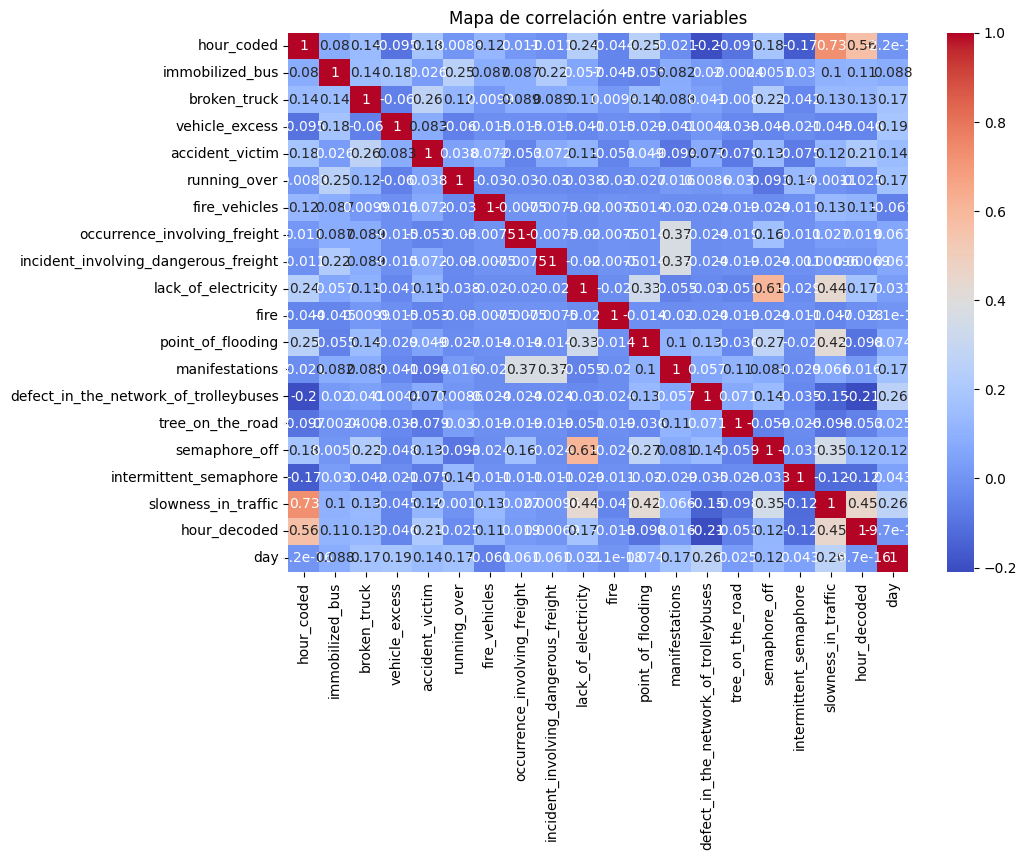

Se visualiza una correlación alta en la variable "Hour" y "Slowness in traffic".
Se visualiza una correlación alta en "Semaphore off" y "lack of electricity".


In [5]:
from src.data.analyze import DataFrameAnalyzer

analyzer = DataFrameAnalyzer('params.yaml')
analyzer.full_analysis()

In [6]:
from src.data.split import data_split

data_split('params.yaml')

2024-10-11 22:36:13,125 — DATA_SPLIT — INFO — Split features into train and test sets
2024-10-11 22:36:13,128 — DATA_SPLIT — INFO — Save train and test sets


In [7]:
from src.model.train import ModelEvaluator

evaluator = ModelEvaluator('params.yaml')
evaluator.run()

2024-10-11 22:36:13,489 - MODEL_EVALUATOR - INFO - Initialized ModelEvaluator
2024-10-11 22:36:13,490 - MODEL_EVALUATOR - INFO - Loading datasets...
2024-10-11 22:36:13,495 - MODEL_EVALUATOR - INFO - Datasets loaded successfully.
2024-10-11 22:36:13,495 - MODEL_EVALUATOR - INFO - Scaling data...
2024-10-11 22:36:13,499 - MODEL_EVALUATOR - INFO - Data scaling completed.
2024-10-11 22:36:13,500 - MODEL_EVALUATOR - INFO - Evaluating model: LR
2024-10-11 22:36:13,532 - MODEL_EVALUATOR - INFO - Model: LR
2024-10-11 22:36:13,533 - MODEL_EVALUATOR - INFO - Best Params: {}
2024-10-11 22:36:13,533 - MODEL_EVALUATOR - INFO - Train RMSE: 2.275, Test RMSE: 2.306
2024-10-11 22:36:13,534 - MODEL_EVALUATOR - INFO - Train MAE: 1.801, Test MAE: 1.836
2024-10-11 22:36:13,534 - MODEL_EVALUATOR - INFO - Train R2: 0.736, Test R2: 0.672
2024-10-11 22:36:13,534 - MODEL_EVALUATOR - INFO - Evaluating model: kNN
2024-10-11 22:36:13,810 - MODEL_EVALUATOR - INFO - Model: kNN
2024-10-11 22:36:13,811 - MODEL_EVALUA

('XGBoost',
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('model',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strate